# Assignment 3
Nathan Willemsen

DS552 - Generative AI

Prof. Narahara Chari Dingari, Ph.D.

January 16, 2025


1. Theory Questions:
- Q1: Why is the KL Divergence term important in the VAE loss function?
- Q2: How does the reparameterization trick enable backpropagation through the stochastic layers of a VAE?
- Q3: Why does a VAE use a probabilistic latent space instead of a fixed latent space?
- Q4: What role does KL Divergence play in ensuring a smooth latent space?


2. Coding Tasks:
- Task 1: Modify the VAE architecture to use convolutional layers for both the encoder and decoder, and train it on the CIFAR-10 dataset. This modification will allow the model to capture spatial relationships within images more effectively, improving its ability to generate high-quality images. After training, compare the generated images with those from a fully connected VAE.
- Task 2: Using the trained VAE, interpolate between two images in the latent space and generate intermediate images. This demonstrates how smoothly the model can transition between different data points. Visualize and display the results, showing the interpolated images in a grid format to observe the transformation.
- Task 3: Train the VAE on a new dataset of your choice (e.g., CelebA for faces), and visualize generated samples. Experiment with sampling from different regions of the latent space and analyze how the generated outputs vary based on different latent vectors.
- Coding Task Explanation: In this assignment, the VAE will be expanded by incorporating convolutional layers in both the encoder and decoder networks. Convolutional layers are particularly effective for image
data, as they can capture spatial hierarchies better than fully connected layers. By using this architecture on the CIFAR-10 dataset (a dataset of small, colorful images), the VAE will be able to learn a more effective latent representation, which should improve the quality of generated images. The second task involves interpolation in the latent space. By interpolating between two points in the latent space (corresponding to two different images), we can observe how smoothly the VAE transitions between two
images. This task highlights the structure of the learned latent space and shows the generative capabilities of the VAE.
Finally, applying the VAE to a new dataset (such as CelebA, a dataset of celebrity faces) and visualizing the generated images allows us to see how well the model generalizes to different kinds of data and how the latent space is structured for more complex, real-world images.


In [1]:
# !pip install torch
# !pip install torchvision

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

In [3]:
# VAE Architecture
class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAE, self).__init__()
        # Encoder
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc_mu = nn.Linear(hidden_dim, latent_dim)
        self.fc_logvar = nn.Linear(hidden_dim, latent_dim)
        # Decoder
        self.fc2 = nn.Linear(latent_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, input_dim)

    def encode(self, x): #TODO: Use convolutional layers for encoding and decoding layers
        h1 = torch.relu(self.fc1(x))
        return self.fc_mu(h1), self.fc_logvar(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h2 = torch.relu(self.fc2(z))
        return torch.sigmoid(self.fc3(h2))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 3072))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar


In [4]:
# Loss function
def loss_function(recon_x, x, mu, logvar):
    BCE = nn.functional.binary_cross_entropy(recon_x, x.view(-1, 3072), reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD


In [5]:
# Training the VAE
def train(model, train_loader, optimizer, epoch):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    print(f'Epoch {epoch}, Loss: {train_loss / len(train_loader.dataset)}')

In [6]:
# TODO: train it on the CIFAR-10 dataset
transform = transforms.ToTensor()
train_dataset = datasets.CIFAR10('./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)

# Load MNIST dataset and run the training
# transform = transforms.ToTensor()
# train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
# train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)

vae = VAE(input_dim=3072, hidden_dim=400, latent_dim=20)
optimizer = optim.Adam(vae.parameters(), lr=1e-3)
    
for epoch in range(1, 11):
    train(vae, train_loader, optimizer, epoch)


Files already downloaded and verified
Epoch 1, Loss: 1928.7509884375
Epoch 2, Loss: 1865.9978953125
Epoch 3, Loss: 1857.5221271875
Epoch 4, Loss: 1853.7255390625
Epoch 5, Loss: 1850.0748759375
Epoch 6, Loss: 1848.29160625
Epoch 7, Loss: 1846.091485625
Epoch 8, Loss: 1844.2730259375
Epoch 9, Loss: 1843.3770471875
Epoch 10, Loss: 1842.7212959375


In [11]:
import matplotlib.pyplot as plt

# Function to generate and display new images
def generate_images(model, num_images=10, latent_dim=20):
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Turn off gradients for generation
        # Sample random points from the latent space (standard normal distribution)
        z = torch.randn(num_images, latent_dim)
        # Decode these points to generate images
        generated_images = model.decode(z).cpu()

    # Plot the generated images
    fig, axs = plt.subplots(1, num_images, figsize=(num_images, 1.5))
    for i in range(num_images):
        axs[i].imshow(generated_images[i].view(100, 100), cmap='gray')
        axs[i].axis('off')
    plt.show()


RuntimeError: shape '[100, 100]' is invalid for input of size 3072

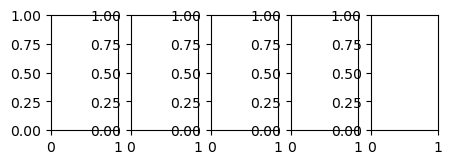

In [12]:
# Assuming you have already trained the model (vae) and it has a latent dimension of 20
generate_images(vae, num_images=5, latent_dim=20)